In [2]:
# Importing Dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


In [3]:
#import 2015 data

csvpath_2015 = os.path.join('Resources', '2015.csv')
csv_2015 = pd.read_csv(csvpath_2015)


In [5]:
# Restructure / Rename
# datasets from 2015 - 2017.
#added region as as column************

# Convert / fix 2015 Data

csv_2015_restructured = csv_2015[["Happiness Rank",
                                 "Country",
                                  "Region",
                                  "Happiness Score",
                                  "Economy (GDP per Capita)",
                                  "Family",
                                  "Health (Life Expectancy)",
                                  "Freedom",
                                  "Generosity",
                                  "Trust (Government Corruption)"]]

csv_2015_restructured = csv_2015_restructured.rename(columns={"Happiness Rank": "Overall rank",
                                      "Country": "Country",
                                      "Region": "Region",                        
                                      "Happiness Score": "Score",
                                      "Economy (GDP per Capita)": "GDP per capita",
                                      "Family": "Social support",
                                      "Health (Life Expectancy)": "Healthy life expectancy",
                                      "Freedom": "Freedom to make life choices",
                                      "Generosity": "Generosity",
                                      "Trust (Government Corruption)": "Perceptions of corruption"})
csv_2015_restructured.head(15)

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957
5,6,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372
6,7,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814
7,8,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844
8,9,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922
9,10,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637


slope:0.27
intercept:-0.63
y=0.27x + -0.63


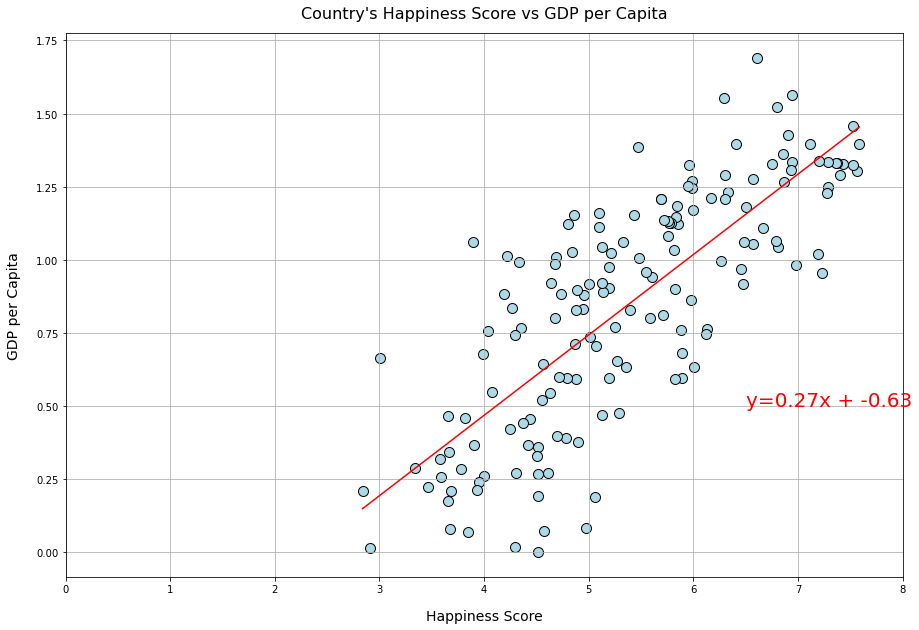

In [44]:
#scatter plot away!

#scatter plot: happiness score vs GDP per capita

#establish x and y values
x_values = csv_2015_restructured["Score"]
y_values = csv_2015_restructured["GDP per capita"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="lightblue", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("GDP per Capita", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs GDP per Capita", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()


In [45]:
csv_2015_restructured.head()

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


slope:0.18
intercept:0.04
y=0.18x + 0.04


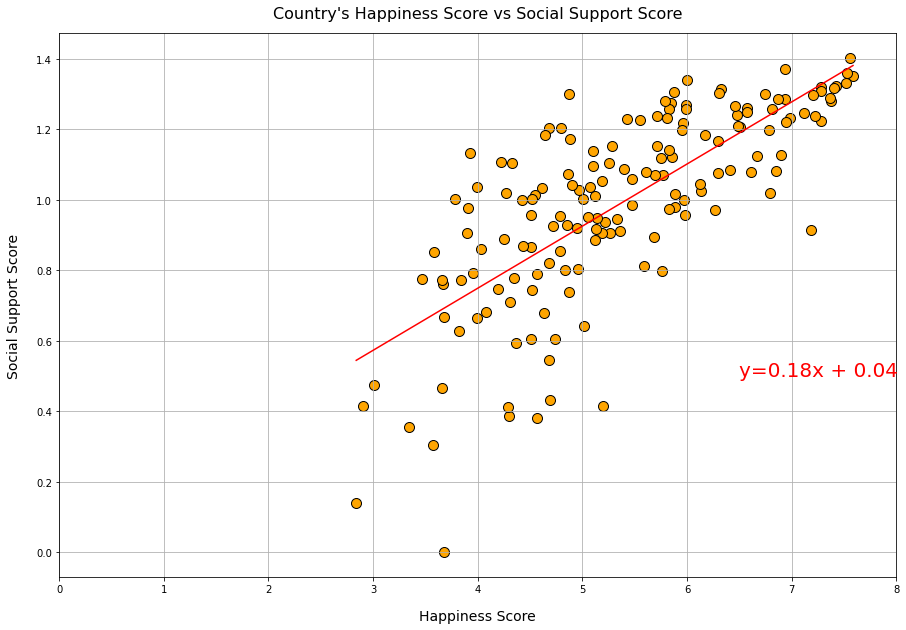

In [58]:
#scatter plot away!

#scatter plot: happiness score vs social support

#establish x and y values
x_values = csv_2015_restructured["Score"]
y_values = csv_2015_restructured["Social support"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="orange", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Social Support Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Social Support Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()

In [47]:
csv_2015_restructured.head()

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


slope:0.16
intercept:-0.21
y=0.16x + -0.21


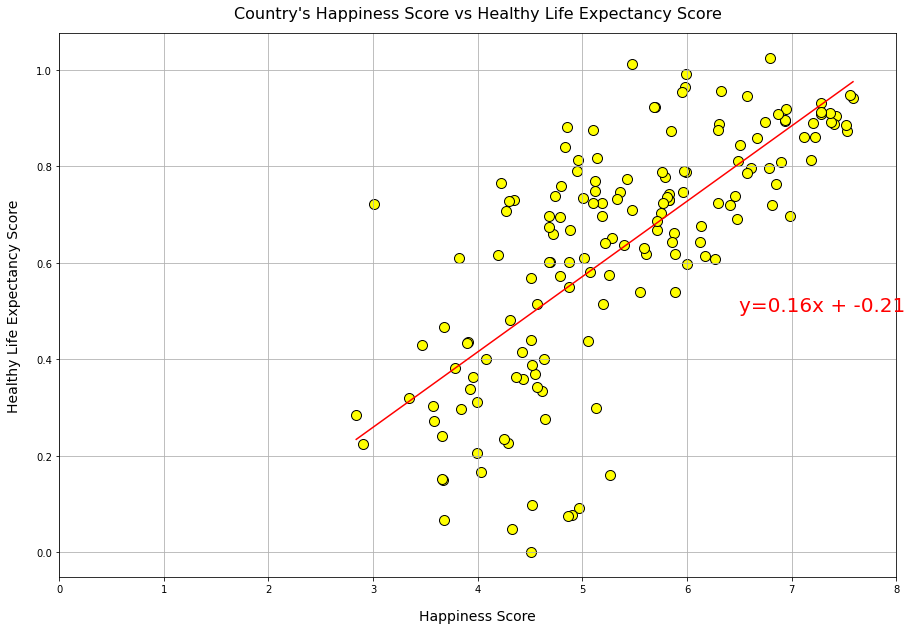

In [57]:
#scatter plot away!

#scatter plot: happiness score vs Healthy life expectancy

#establish x and y values
x_values = csv_2015_restructured["Score"]
y_values = csv_2015_restructured["Healthy life expectancy"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="yellow", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Healthy Life Expectancy Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Healthy Life Expectancy Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()

In [49]:
csv_2015_restructured.head()

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


slope:0.07
intercept:0.03
y=0.07x + 0.03


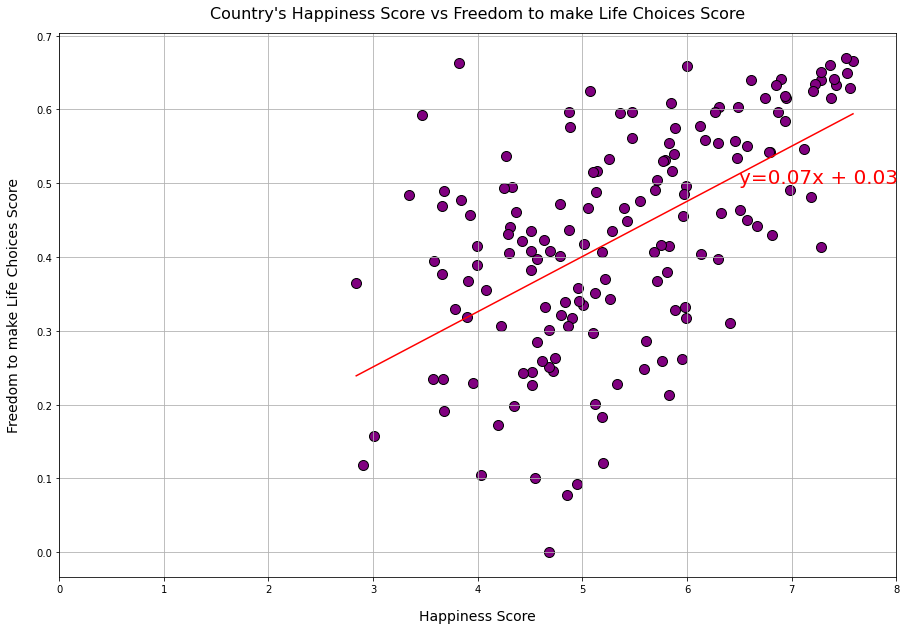

In [56]:
#scatter plot away!

#scatter plot: happiness score vs Freedom to make Life Choices

#establish x and y values
x_values = csv_2015_restructured["Score"]
y_values = csv_2015_restructured["Freedom to make life choices"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="purple", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Freedom to make Life Choices Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Freedom to make Life Choices Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()

In [51]:
csv_2015_restructured.head()

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


slope:0.02
intercept:0.13
y=0.02x + 0.13


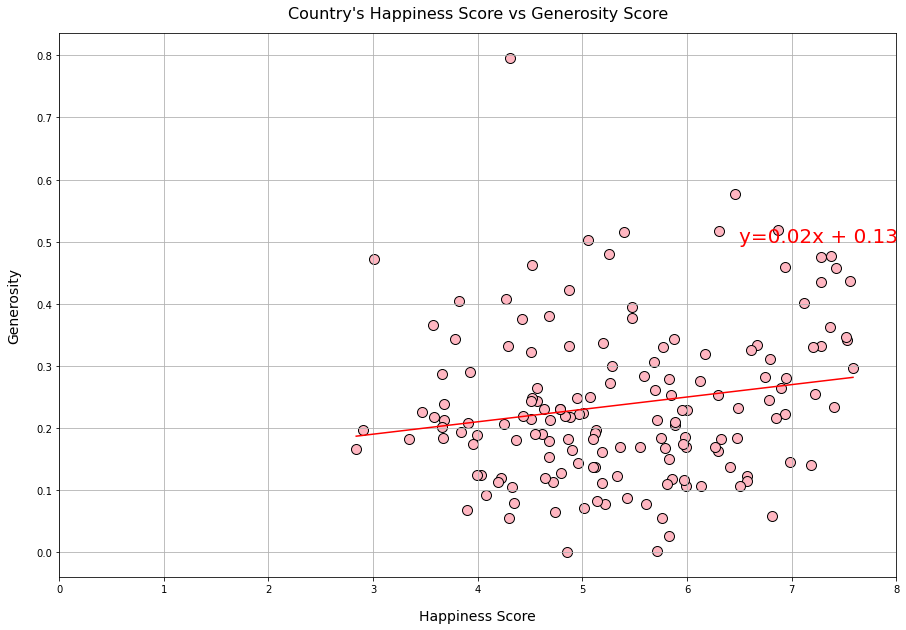

In [53]:
#scatter plot away!

#scatter plot: happiness score vs Generosity

#establish x and y values
x_values = csv_2015_restructured["Score"]
y_values = csv_2015_restructured["Generosity"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="lightpink", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Generosity", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Generosity Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()

In [54]:
csv_2015_restructured.head()

,Overall rank,Country,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


slope:0.04
intercept:-0.08
y=0.04x + -0.08


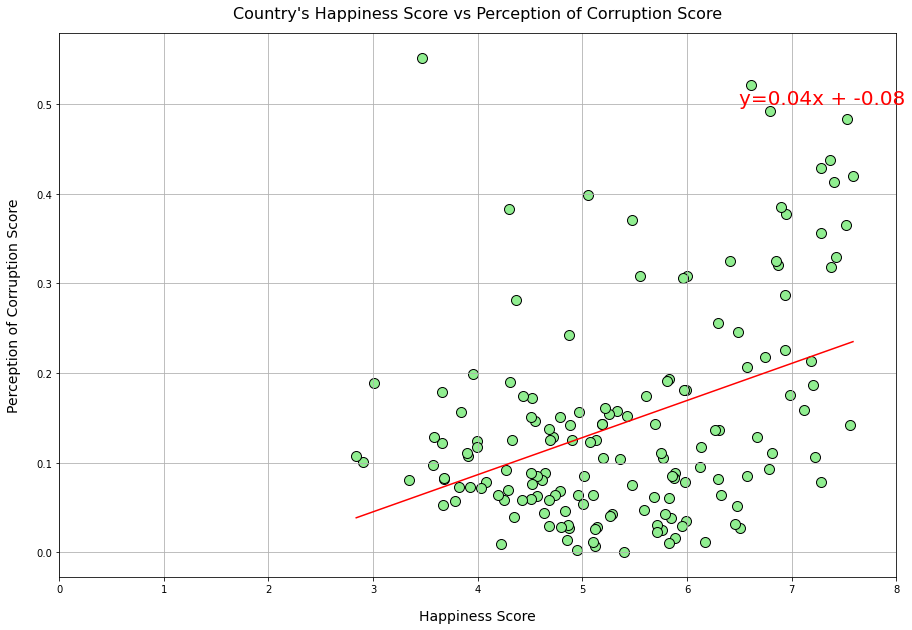

In [55]:
#scatter plot away!

#scatter plot: happiness score vs Perceptions of corruption

#establish x and y values
x_values = csv_2015_restructured["Score"]
y_values = csv_2015_restructured["Perceptions of corruption"]

#create scatter plot
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values, y_values, marker = "o", facecolors="lightgreen", edgecolors="black", s=100)

#labels
plt.xlabel("Happiness Score", labelpad=15, fontsize=14)
plt.ylabel("Perception of Corruption Score", labelpad=15, fontsize=14)
plt.title("Country's Happiness Score vs Perception of Corruption Score", pad=15, fontsize=16)

#limits
plt.xlim(0,8)

#more formatting
plt.grid()

#linear regression
#use linregress from dependencies to inplement linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#print out all variables calculated above (rvalue, pvalue...)
print(f"slope:{round(slope, 2)}")
print(f"intercept:{round(intercept,2)}")


#print out line eq for reference
line_eq = (f"y={round(slope, 2)}x + {round(intercept, 2)}")
print(line_eq)

#plot out line and then solve for y=mx +b
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6.5, 0.5), fontsize =20, color = "red")
plt.show()